In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt


%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
market_ticker = '^GSPC'
stock_ticker = 'acn'

stime='2022-01-01'
ftime=None

In [4]:
def get_data_from_ticker(tick, stime, ftime, interval='1d'):
    ticker = yf.Ticker(tick)
    # df = ticker.history(start='2021-01-01', end='2022-06-30')
    # df = ticker.history(start='2021-01-01', end='2022-07-26')
    # df = ticker.history(start='2020-01-01', end='2021-01-01')
    # df = ticker.history(start='2022-05-28')
    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

gf = pd.DataFrame(get_data_from_ticker(market_ticker, stime, ftime))
sf = pd.DataFrame(get_data_from_ticker(stock_ticker, stime, ftime))
gf[stock_ticker] = sf[stock_ticker]


gf.head(3)

,^GSPC,acn
Date,,
2022-01-03 00:00:00-05:00,4796.560059,401.729431
2022-01-04 00:00:00-05:00,4793.540039,398.858582
2022-01-05 00:00:00-05:00,4700.580078,391.834412


In [8]:
def add_percent_update(tick):
    """ date stock's or market's update"""
    gf_copy = gf.copy(deep=True)
    gf_copy = pd.DataFrame(gf_copy.drop(gf.index[0]))
    gf_copy_v = gf_copy[tick].values
    gf_v = gf.copy(deep=True)
    gf_vv = gf_v[tick].values

    for i in range(len(gf_copy)):
        gf_vv[i] = (gf_copy_v[i] - gf_vv[i]) / (gf_vv[i] / 100)

    gf_vv = np.insert(gf_vv, 0, 0)
    gf_vv = np.delete(gf_vv, -1)
    return gf_vv

gf[f"% update {market_ticker}"] = add_percent_update(market_ticker)
gf[f"% update {stock_ticker}"] = add_percent_update(stock_ticker)

gf.head(3)

,^GSPC,acn,% update ^GSPC,% update acn
Date,,,,
2022-01-03 00:00:00-05:00,4796.560059,401.729431,0.000000,0.000000
2022-01-04 00:00:00-05:00,4793.540039,398.858582,-0.062962,-0.714623
2022-01-05 00:00:00-05:00,4700.580078,391.834412,-1.939276,-1.761068


(array([ 1.,  1.,  1.,  0.,  2.,  1.,  2.,  0.,  2.,  3.,  0.,  4.,  0.,
         4.,  4.,  6.,  6.,  4.,  6.,  9.,  9., 17.,  9., 12., 10., 19.,
         7.,  8.,  9.,  9.,  6.,  5.,  8.,  8.,  5.,  8.,  3.,  6.,  3.,
         4.,  2.,  6.,  4.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-4.32366134, -4.15920951, -3.99475768, -3.83030585, -3.66585402,
        -3.50140219, -3.33695036, -3.17249853, -3.0080467 , -2.84359487,
        -2.67914304, -2.51469121, -2.35023938, -2.18578756, -2.02133573,
        -1.8568839 , -1.69243207, -1.52798024, -1.36352841, -1.19907658,
        -1.03462475, -0.87017292, -0.70572109, -0.54126926, -0.37681743,
        -0.2123656 , -0.04791377,  0.11653806,  0.28098989,  0.44544172,
         0.60989355,  0.77434538,  0.93879721,  1.10324904,  1.26770087,
         1.4321527 ,  1.59660453,  1.76105636,  1.92550818,  2.08996001,
         2.25441184,  2.41886367,  2.5833155 ,  2.74776733,  2.91221916,
 

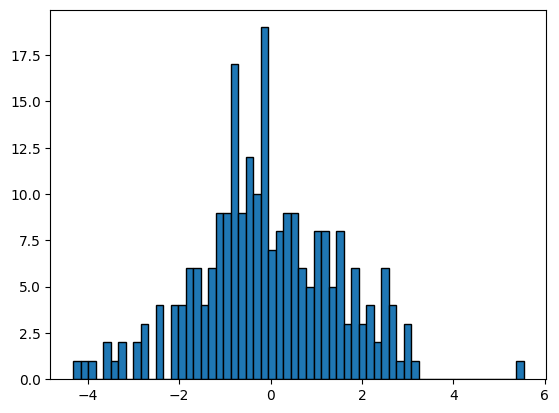

In [7]:
plt.hist(list(gf['% update ^GSPC'].values), bins=60, edgecolor='black')

(array([ 2.,  0.,  0.,  1.,  1.,  1.,  2.,  1.,  2.,  5.,  1.,  4.,  2.,
         1.,  3.,  4.,  3., 11.,  5., 14.,  7., 15., 10., 11., 13., 16.,
        10.,  7., 10.,  8., 14.,  6.,  3.,  4.,  9.,  7.,  1.,  4.,  5.,
         5.,  1.,  2.,  1.,  0.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-5.80959488, -5.58403396, -5.35847304, -5.13291212, -4.9073512 ,
        -4.68179028, -4.45622936, -4.23066844, -4.00510752, -3.7795466 ,
        -3.55398568, -3.32842476, -3.10286384, -2.87730292, -2.651742  ,
        -2.42618107, -2.20062015, -1.97505923, -1.74949831, -1.52393739,
        -1.29837647, -1.07281555, -0.84725463, -0.62169371, -0.39613279,
        -0.17057187,  0.05498905,  0.28054997,  0.50611089,  0.73167181,
         0.95723273,  1.18279365,  1.40835457,  1.63391549,  1.85947641,
         2.08503733,  2.31059825,  2.53615917,  2.7617201 ,  2.98728102,
         3.21284194,  3.43840286,  3.66396378,  3.8895247 ,  4.11508562,
 

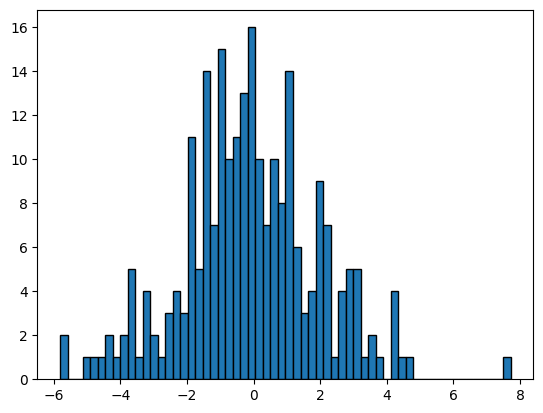

In [9]:
plt.hist(list(gf['% update acn'].values), bins=60, edgecolor='black')

математическое ожидание

In [32]:
# %time snp_mat_expectation = gf['% update ^GSPC'].sum() / gf['% update ^GSPC'].value_counts().sum()
# %time snp_mat_expectation = np.average(gf['% update ^GSPC'])
snp_mat_expectation = gf['% update ^GSPC'].mean()
snp_mat_expectation

-0.06214741445874533

стандартное отклонение

In [24]:
snp_standart_deviation = gf['% update ^GSPC'].std()
snp_standart_deviation

1.5363678114468962

In [25]:
snp_standart_deviation = gf['% update acn'].std()
snp_standart_deviation

2.055490146441834